In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
trade_df = pd.read_csv(r'US_trade_data.csv')
trade_df.set_index('Year', inplace= True)
column = {'Country Name' : 'Country_Name',
        'Country Code' : 'Country_Code',
        'Trade (% of GDP)' : 'TRADE_OPEN',
        'Population growth (annual %)' : 'POP_GROWTH',
        'GDP growth (annual %)' : 'GDP_GROWTH',
        'GDP per capita' : 'GDP_PER_CAPITA',
        'Inflation, CPI (annual %)' : 'INFLATION',
        'Employment to population ratio, 15+' : 'EMPLOYMENT',
        'Net FDI(BoP, current US$)' : 'NET_FDI',
        'Government total expenditures' : 'GOVT_EXP',
        }
trade_df.rename(columns=column, inplace= True)
trade_df

,TRADE_OPEN,POP_GROWTH,GDP_GROWTH,GDP_PER_CAPITA,INFLATION,EMPLOYMENT,NET_FDI,GOVT_EXP,INDPRO_IDX,HUMCAP_IDX
Year,,,,,,,,,,
1961,NaN,1.657730,2.300000,3066.562869,1.070724,55.400000,NaN,161.749,23.3892,2.755555
1962,NaN,1.537997,6.100000,3243.843078,1.198773,55.500000,NaN,174.455,25.3385,2.790292
1963,NaN,1.439165,4.400000,3374.515171,1.239669,55.400000,NaN,182.854,26.8912,2.825467
1964,NaN,1.389046,5.800000,3573.941185,1.278912,55.700000,NaN,192.328,28.7016,2.861085
1965,NaN,1.250172,6.400000,3827.527110,1.585169,56.200000,NaN,204.882,31.5538,2.897152
...,...,...,...,...,...,...,...,...,...,...
2017,27.279161,0.632644,2.241921,59907.754260,2.130110,59.237000,2.859000e+10,6594.039,100.0000,3.738714
2018,27.610379,0.526435,2.945385,62823.309440,2.442583,59.549000,-3.450000e+11,6937.736,103.1501,3.744024
2019,26.451949,0.455381,2.294439,65120.394660,1.812210,59.923000,-2.090000e+11,7338.825,102.4293,3.749341


In [3]:
trade_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 1961 to 2021
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TRADE_OPEN      52 non-null     float64
 1   POP_GROWTH      61 non-null     float64
 2   GDP_GROWTH      61 non-null     float64
 3   GDP_PER_CAPITA  61 non-null     float64
 4   INFLATION       61 non-null     float64
 5   EMPLOYMENT      61 non-null     float64
 6   NET_FDI         52 non-null     float64
 7   GOVT_EXP        61 non-null     float64
 8   INDPRO_IDX      61 non-null     float64
 9   HUMCAP_IDX      59 non-null     float64
dtypes: float64(10)
memory usage: 5.2 KB


In [4]:
trade_df.describe().T

,count,mean,std,min,25%,50%,75%,max
TRADE_OPEN,52.0,2.171788e+01,5.309349e+00,1.075718e+01,1.753321e+01,2.236988e+01,2.584190e+01,3.084249e+01
POP_GROWTH,61.0,9.969462e-01,2.561947e-01,1.183805e-01,8.938292e-01,9.612011e-01,1.154893e+00,1.657730e+00
GDP_GROWTH,61.0,2.986231e+00,2.177160e+00,-2.767803e+00,2.010508e+00,3.100000e+00,4.447175e+00,7.236633e+00
GDP_PER_CAPITA,61.0,2.781730e+04,2.008979e+04,3.066563e+03,8.592254e+03,2.434226e+04,4.630200e+04,7.024863e+04
INFLATION,61.0,3.733183e+00,2.761082e+00,-3.555463e-01,1.898048e+00,3.015075e+00,4.300535e+00,1.354920e+01
EMPLOYMENT,61.0,5.933530e+01,2.371844e+00,5.540000e+01,5.750000e+01,5.920000e+01,6.150000e+01,6.345500e+01
NET_FDI,52.0,2.624019e+09,9.672082e+10,-3.450000e+11,-1.753700e+10,5.060000e+09,3.294000e+10,1.770000e+11
GOVT_EXP,61.0,2.804591e+03,2.479048e+03,1.617490e+02,6.165630e+02,2.166643e+03,4.519635e+03,9.586079e+03
INDPRO_IDX,61.0,6.743209e+01,2.573778e+01,2.338920e+01,4.505810e+01,6.233100e+01,9.357810e+01,1.031501e+02
HUMCAP_IDX,59.0,3.398109e+00,2.814880e-01,2.755555e+00,3.238250e+00,3.435097e+00,3.622692e+00,3.749341e+00


In [5]:
trade_df.isna().sum()

TRADE_OPEN        9
POP_GROWTH        0
GDP_GROWTH        0
GDP_PER_CAPITA    0
INFLATION         0
EMPLOYMENT        0
NET_FDI           9
GOVT_EXP          0
INDPRO_IDX        0
HUMCAP_IDX        2
dtype: int64

In [6]:
trade_df.isna().mean()

TRADE_OPEN        0.147541
POP_GROWTH        0.000000
GDP_GROWTH        0.000000
GDP_PER_CAPITA    0.000000
INFLATION         0.000000
EMPLOYMENT        0.000000
NET_FDI           0.147541
GOVT_EXP          0.000000
INDPRO_IDX        0.000000
HUMCAP_IDX        0.032787
dtype: float64

In [7]:
trade_df.isna().sum().sum()

20

In [8]:
trade_df.duplicated().sum()

0

In [9]:
corr = trade_df.corr()
corr

,TRADE_OPEN,POP_GROWTH,GDP_GROWTH,GDP_PER_CAPITA,INFLATION,EMPLOYMENT,NET_FDI,GOVT_EXP,INDPRO_IDX,HUMCAP_IDX
TRADE_OPEN,1.000000,-0.473472,-0.180756,0.898165,-0.502316,0.198473,0.047436,0.838242,0.936704,0.956879
POP_GROWTH,-0.473472,1.000000,0.136924,-0.669946,-0.028089,-0.053656,0.183768,-0.688306,-0.617801,-0.665454
GDP_GROWTH,-0.180756,0.136924,1.000000,-0.304230,-0.134780,0.003798,-0.215330,-0.323351,-0.281202,-0.351609
GDP_PER_CAPITA,0.898165,-0.669946,-0.304230,1.000000,-0.429462,0.310789,-0.069310,0.983138,0.962175,0.913258
INFLATION,-0.502316,-0.028089,-0.134780,-0.429462,1.000000,-0.035580,-0.018691,-0.420485,-0.371014,-0.212964
EMPLOYMENT,0.198473,-0.053656,0.003798,0.310789,-0.035580,1.000000,-0.179528,0.168128,0.492362,0.607439
NET_FDI,0.047436,0.183768,-0.215330,-0.069310,-0.018691,-0.179528,1.000000,-0.024700,-0.038303,-0.039606
GOVT_EXP,0.838242,-0.688306,-0.323351,0.983138,-0.420485,0.168128,-0.024700,1.000000,0.906605,0.878393
INDPRO_IDX,0.936704,-0.617801,-0.281202,0.962175,-0.371014,0.492362,-0.038303,0.906605,1.000000,0.947040
HUMCAP_IDX,0.956879,-0.665454,-0.351609,0.913258,-0.212964,0.607439,-0.039606,0.878393,0.947040,1.000000


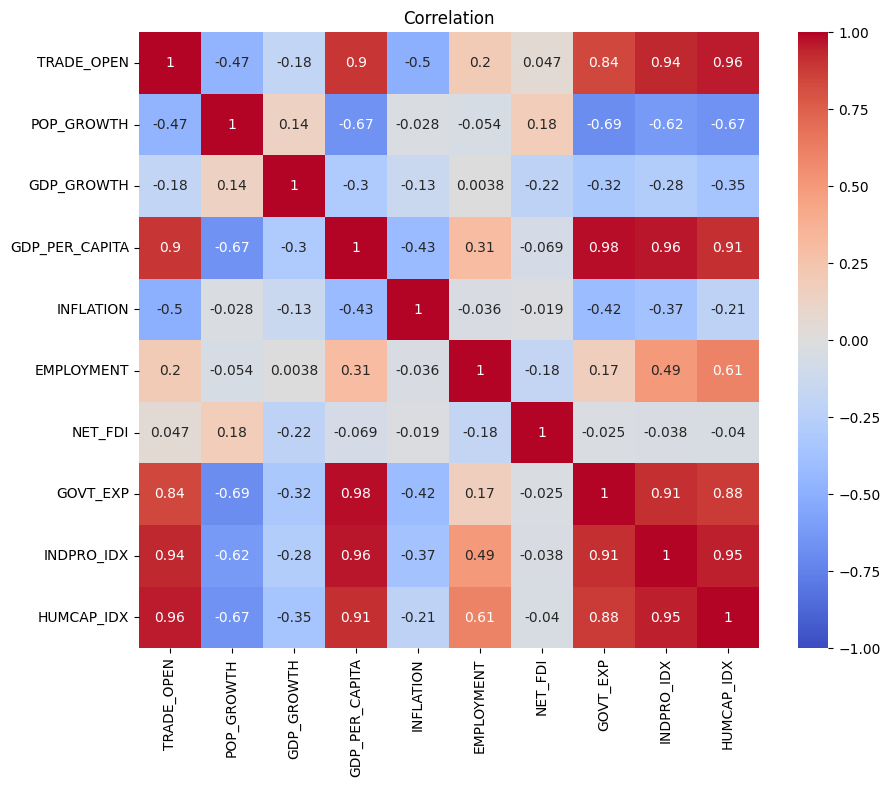

In [10]:
fig, ax = plt.subplots(figsize = (10, 8))

# create a heatmap using seaborn
heatmap = sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax =ax)

# set rotation for x-axis and y-axis tick labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)

# set plot title
plt.title('Correlation')

# show the plot
plt.show()

In [11]:
trade_dropna = trade_df.dropna()

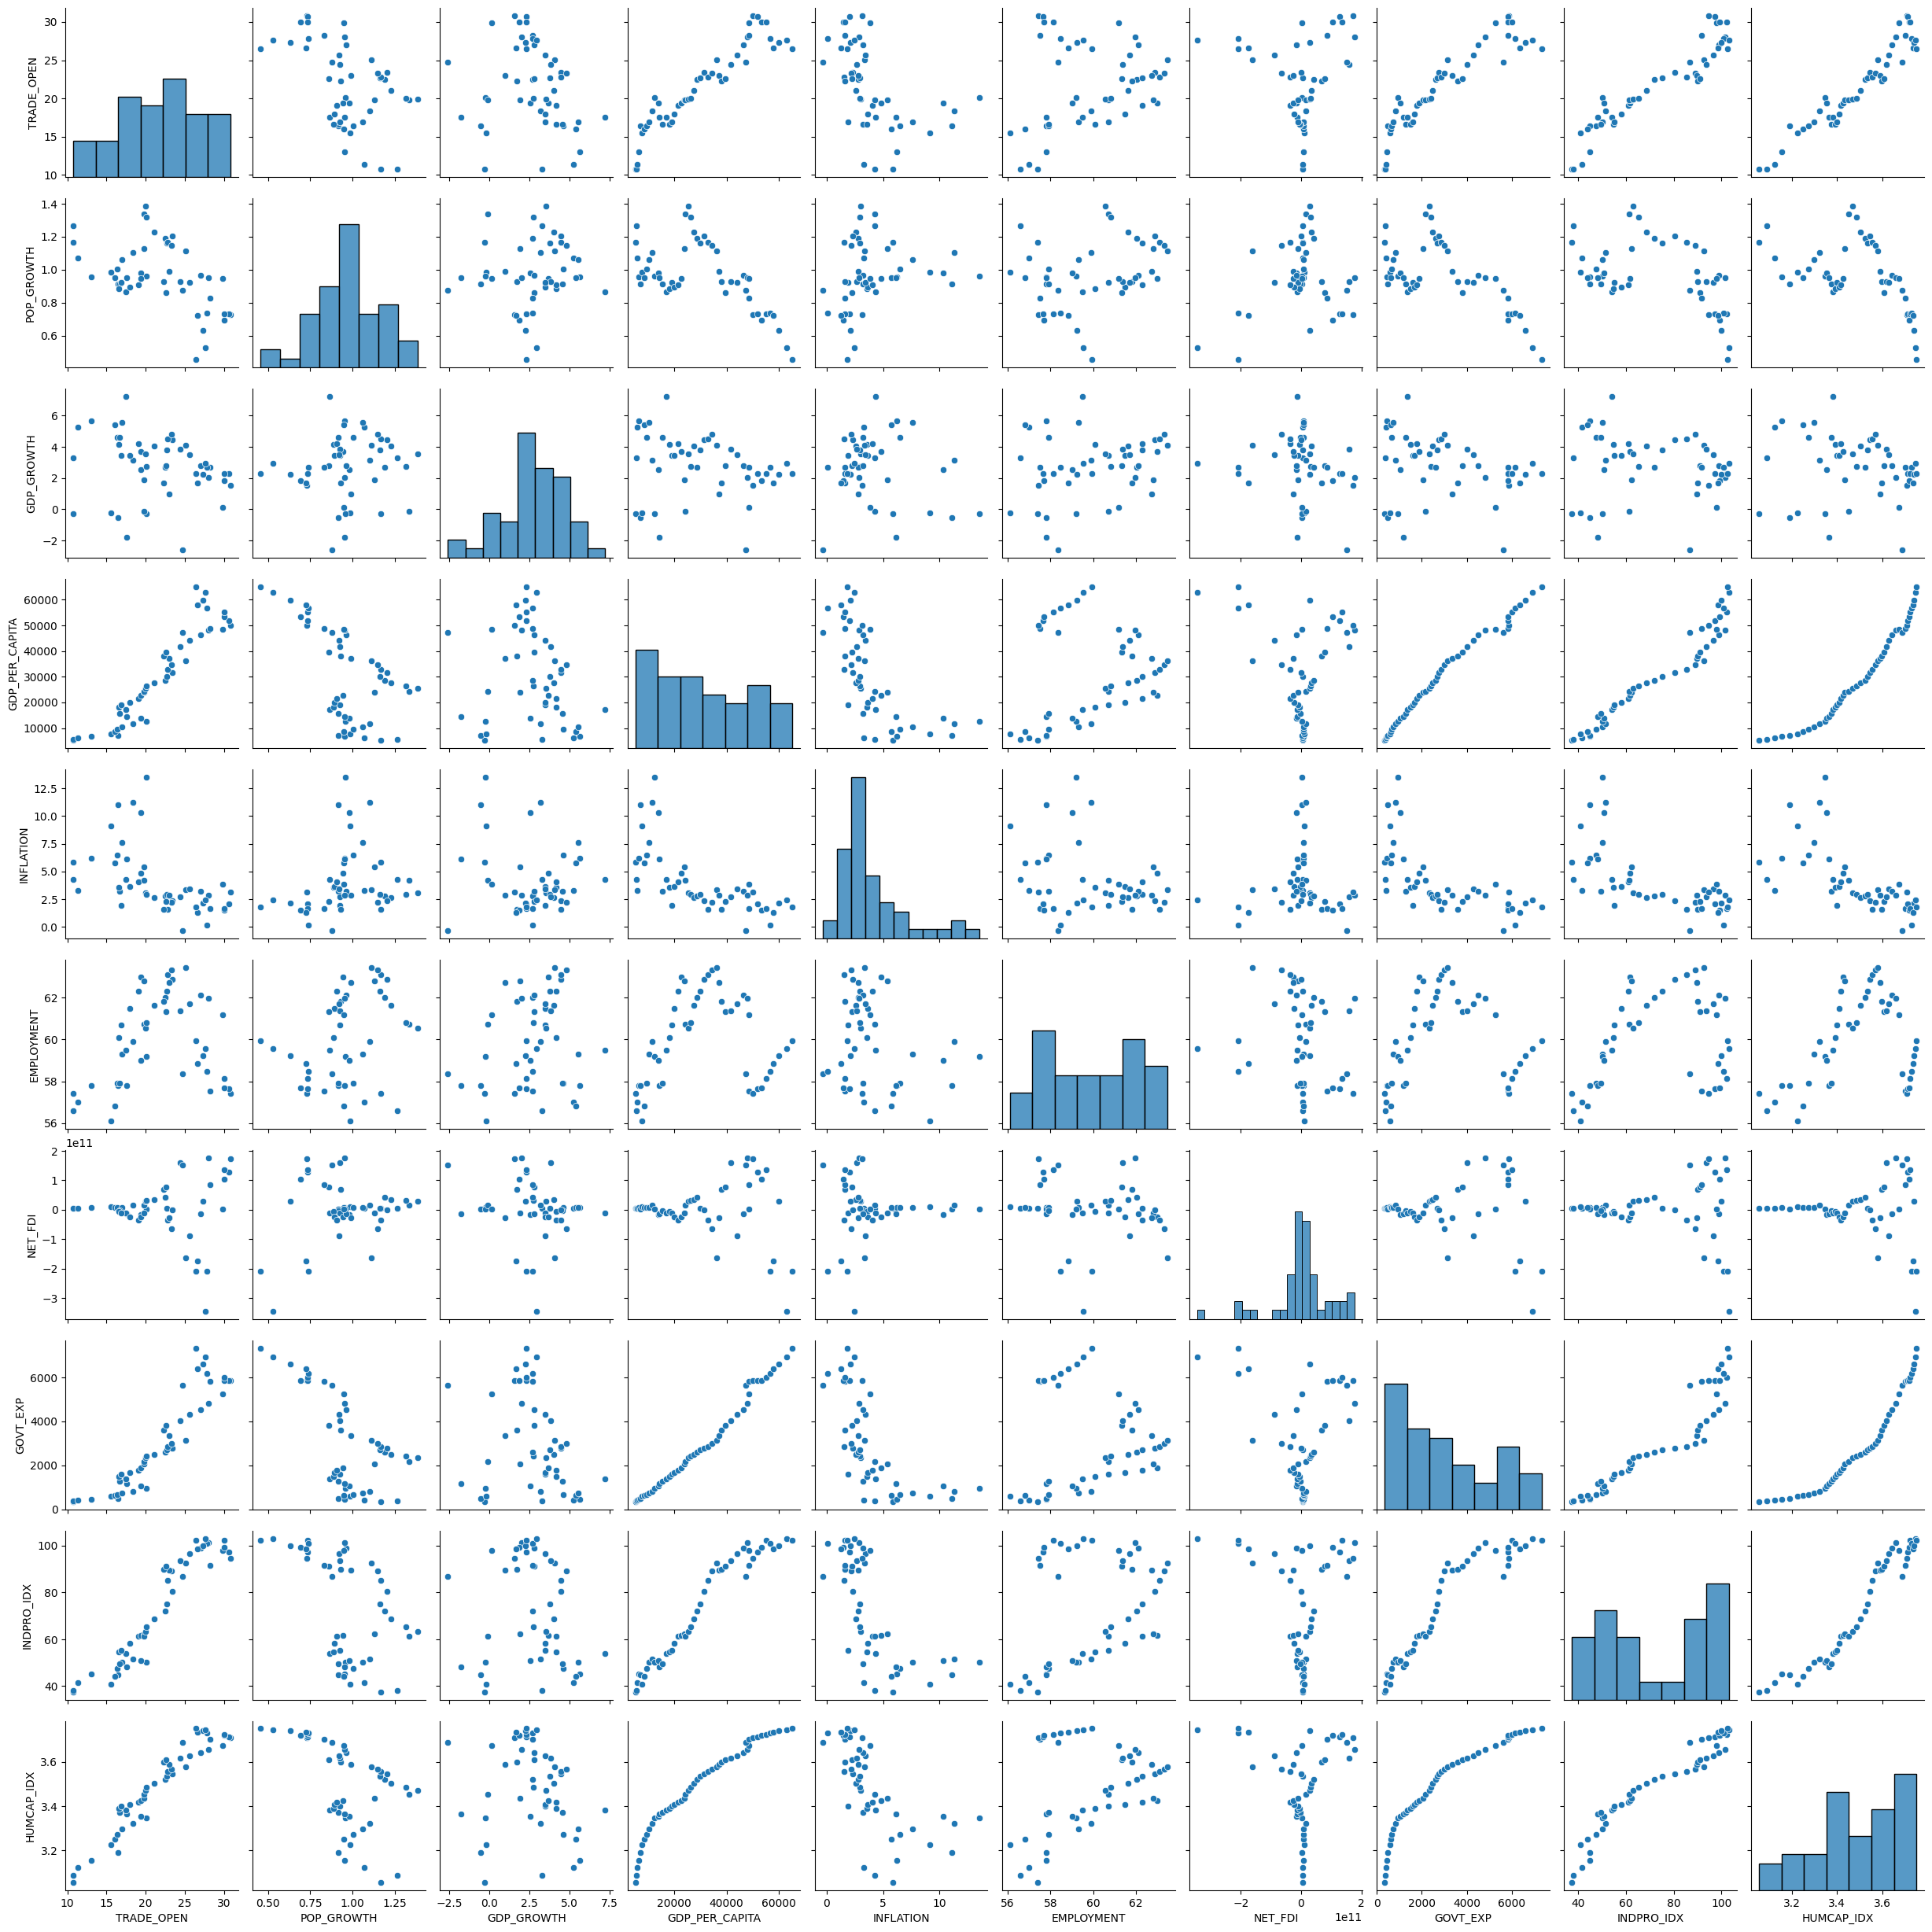

In [12]:
# Set the hue parameter to the country column
sns.pairplot(trade_dropna)

Text(0, 0.5, 'Indicator Values')

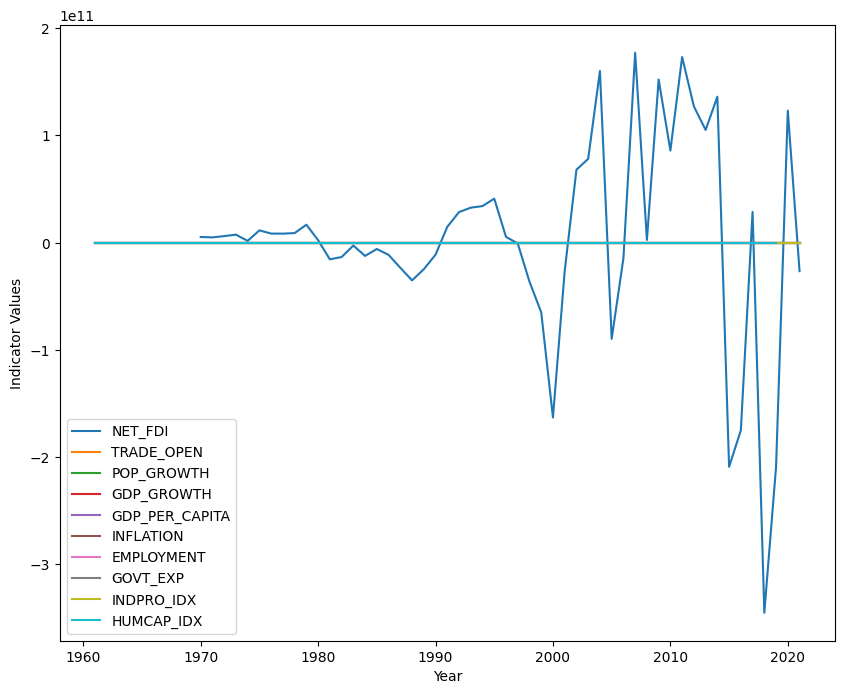

In [13]:
fig, ax = plt.subplots(figsize = (10, 8))
trade_df['NET_FDI'].plot.line(legend = True, ax = ax)
trade_df.drop(columns =('NET_FDI')).plot.line(legend = True, ax = ax)
ax.set_ylabel('Indicator Values')

# fig, ax = plt.subplots(figsize=(10, 8))
# trade_df['NET_FDI'].plot.line(legend=True, ax=ax)
# ax.set_ylabel('NET_FDI')

# ax2 = ax.twinx()
# trade_df.drop(columns=['NET_FDI']).plot.line(legend=True, ax=ax2)
# ax2.set_ylabel('Other Indicators')

# plt.show()


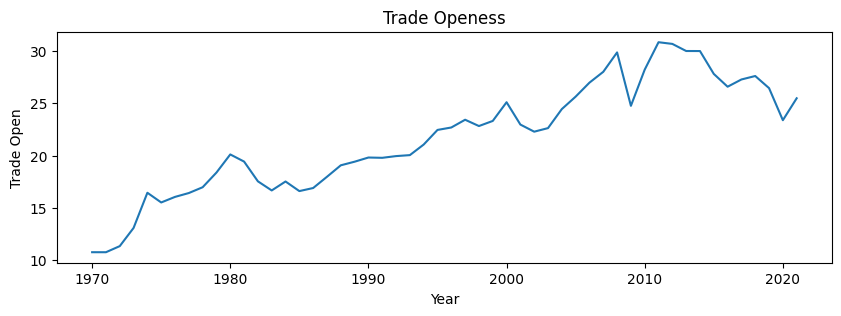

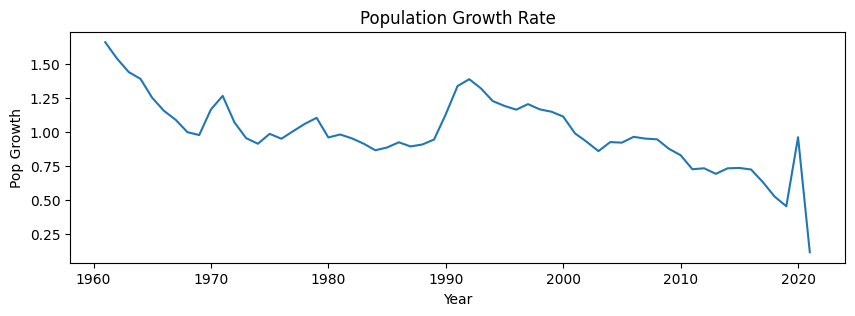

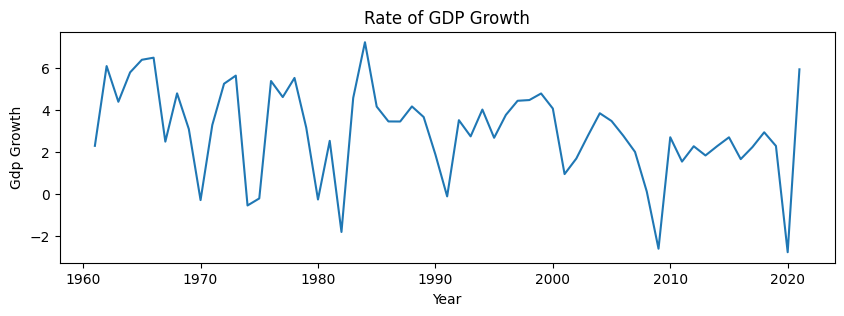

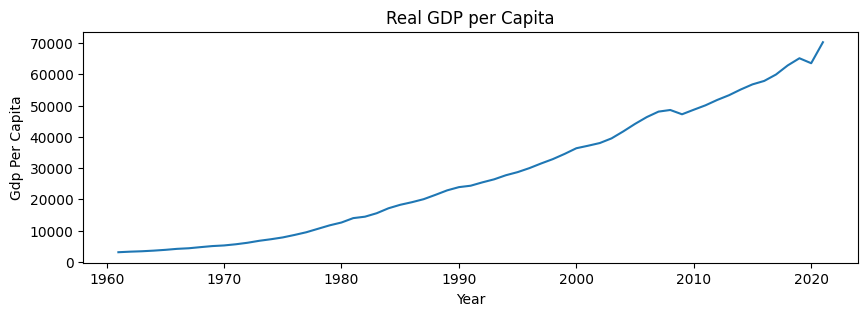

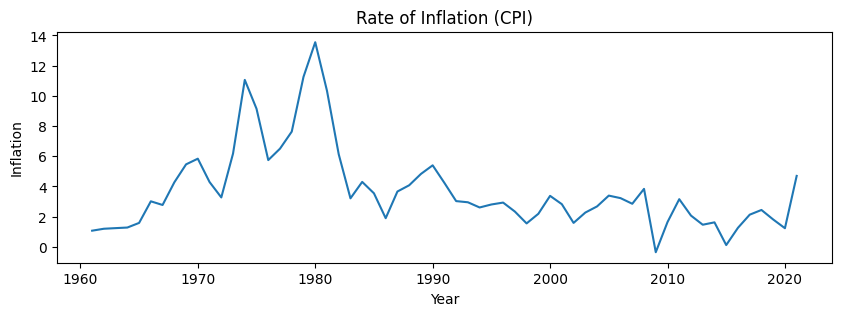

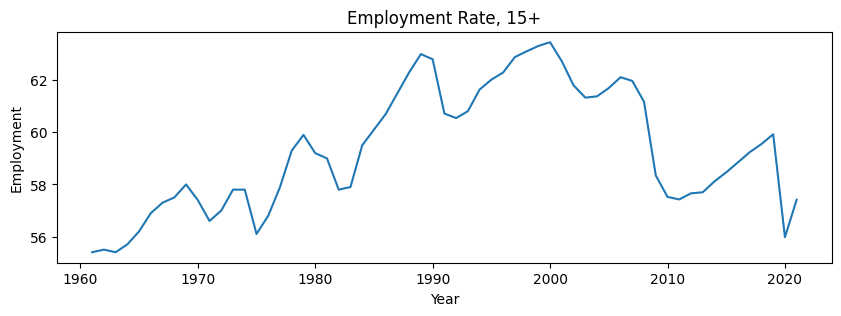

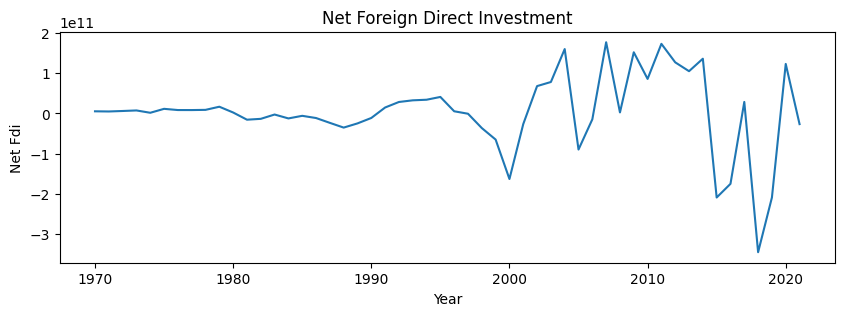

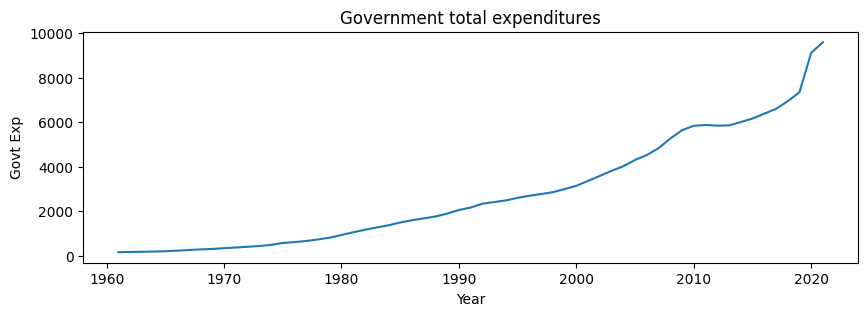

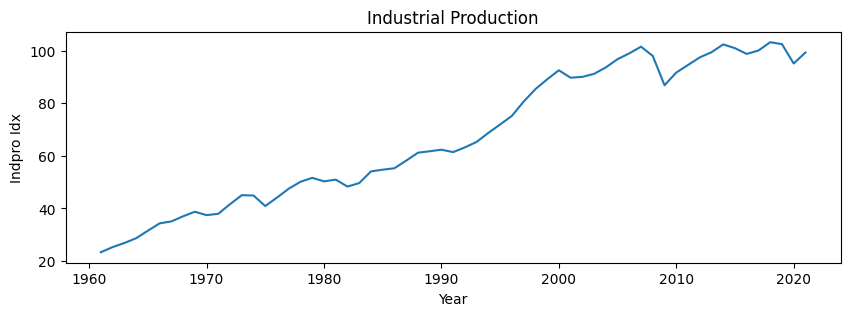

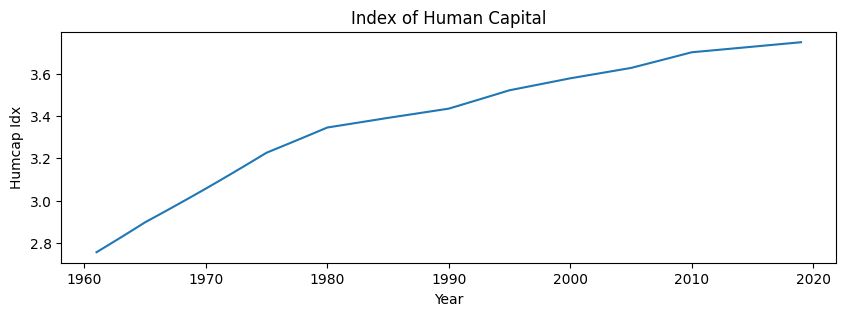

In [14]:
def line_plot(data, columns, titles, figsize=(10,3), linewidth=1.5):
    '''
    This function takes in a dataframe and plots each column on a separate line graph using seaborn.

    Parameters:
        data (pandas DataFrame): The dataframe to plot.
        columns (list of str): The names of the columns to plot.
        titles (list of str): The titles for each plot.
        figsize (tuple): The size of the plots.
        palette (str): The color palette to use.
        linewidth (float): The width of the lines in the plots.

    Returns:
        None
    '''
    for column, title in zip(columns, titles):
        plt.figure(figsize=figsize)
        sns.lineplot(data=data[column], linewidth=linewidth)
        plt.title(title)
        plt.xlabel('Year')
        plt.ylabel(column.replace('_', ' ').title())  # update y-axis label using column name
        #plt.legend()
    plt.show()


# Define the columns and titles for the plots
columns = ['TRADE_OPEN', 'POP_GROWTH', 'GDP_GROWTH', 'GDP_PER_CAPITA', 'INFLATION', 'EMPLOYMENT', 'NET_FDI', 'GOVT_EXP', 'INDPRO_IDX', 'HUMCAP_IDX']
titles = ['Trade Openess', 'Population Growth Rate', 'Rate of GDP Growth', 'Real GDP per Capita', 'Rate of Inflation (CPI)',
            'Employment Rate, 15+', 'Net Foreign Direct Investment', 'Government total expenditures', 'Industrial Production', 'Index of Human Capital']

# Call the function to plot the columns
line_plot(trade_df, columns, titles)

In [15]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

# create imputer object with mean strategy
imputer = SimpleImputer(strategy='mean')

# impute missing values in the dataframe
trade_df_imputed = pd.DataFrame(imputer.fit_transform(trade_df),
                                 columns=trade_df.columns)

# separate input and output variables
X = trade_df_imputed.drop(['TRADE_OPEN', 'GDP_GROWTH', 'EMPLOYMENT', 'NET_FDI'], axis=1)
y = trade_df_imputed[['TRADE_OPEN', 'GDP_GROWTH', 'EMPLOYMENT', 'NET_FDI']]

# Train two separate models, one for each target variable
model_trade = LinearRegression()
model_trade.fit(X, y['TRADE_OPEN'])

model_gdp = LinearRegression()
model_gdp.fit(X, y['GDP_GROWTH'])

model_emp = LinearRegression()
model_emp.fit(X, y['EMPLOYMENT'])

model_fdi = LinearRegression()
model_fdi.fit(X, y['NET_FDI'])

# Predict missing values
gdp_pred = model_gdp.predict(X)
emp_pred = model_emp.predict(X)

# Replace missing values in the original dataframe with predicted values
trade_df.loc[trade_df['TRADE_OPEN'].isnull(), 'TRADE_OPEN'] = emp_pred[trade_df['TRADE_OPEN'].isnull()]
trade_df.loc[trade_df['NET_FDI'].isnull(), 'NET_FDI'] = emp_pred[trade_df['NET_FDI'].isnull()]

In [16]:
trade_df.isna().sum()

TRADE_OPEN        0
POP_GROWTH        0
GDP_GROWTH        0
GDP_PER_CAPITA    0
INFLATION         0
EMPLOYMENT        0
NET_FDI           0
GOVT_EXP          0
INDPRO_IDX        0
HUMCAP_IDX        2
dtype: int64

In [17]:
trade_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 1961 to 2021
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TRADE_OPEN      61 non-null     float64
 1   POP_GROWTH      61 non-null     float64
 2   GDP_GROWTH      61 non-null     float64
 3   GDP_PER_CAPITA  61 non-null     float64
 4   INFLATION       61 non-null     float64
 5   EMPLOYMENT      61 non-null     float64
 6   NET_FDI         61 non-null     float64
 7   GOVT_EXP        61 non-null     float64
 8   INDPRO_IDX      61 non-null     float64
 9   HUMCAP_IDX      59 non-null     float64
dtypes: float64(10)
memory usage: 5.2 KB


IndexError: index 3 is out of bounds for axis 0 with size 2

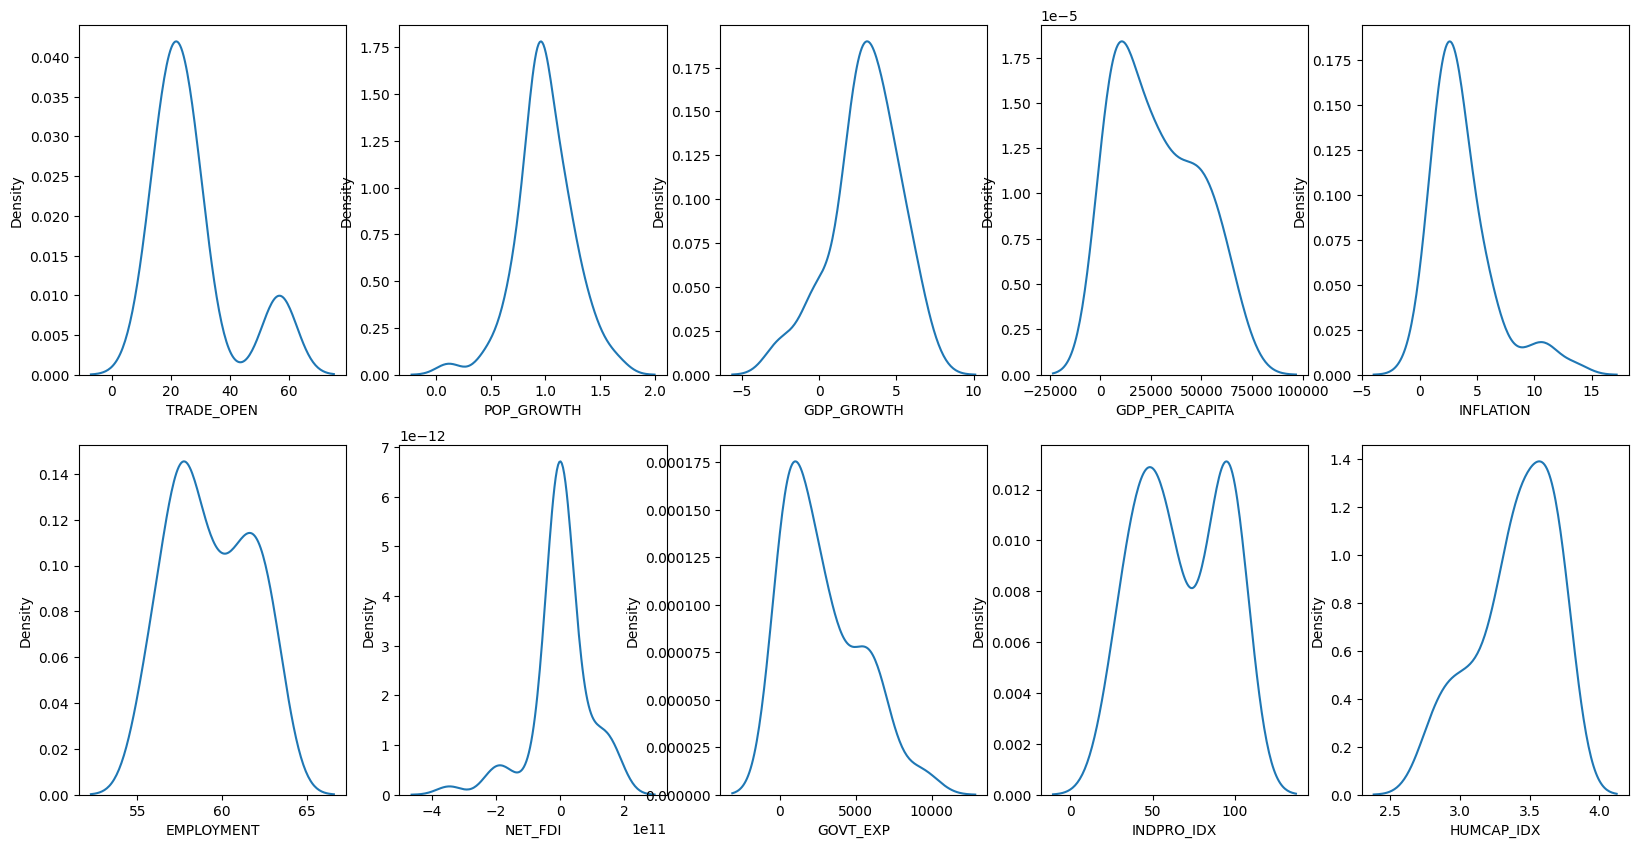

In [18]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10))

# Plot the kernel density estimate of the dataset
sns.kdeplot(trade_df['TRADE_OPEN'], ax=ax[0,0])
sns.kdeplot(trade_df['POP_GROWTH'], ax=ax[0,1])
sns.kdeplot(trade_df['GDP_GROWTH'], ax=ax[0,2])
sns.kdeplot(trade_df['GDP_PER_CAPITA'], ax=ax[0,3])
sns.kdeplot(trade_df['INFLATION'], ax=ax[0,4])
sns.kdeplot(trade_df['EMPLOYMENT'], ax=ax[1,0])
sns.kdeplot(trade_df['NET_FDI'], ax=ax[1,1])
sns.kdeplot(trade_df['GOVT_EXP'], ax=ax[1,2])
sns.kdeplot(trade_df['INDPRO_IDX'], ax=ax[1,3])
sns.kdeplot(trade_df['HUMCAP_IDX'], ax=ax[1,4])

# Set x-axis labels for all plots
# Set x-axis labels for all subplots using a loop
xlabels = trade_df.columns
for i in range(len(xlabels)):
    ax[3, i].set_xlabel(xlabels[i])

# Set y-axis label for the entire figure
fig.text(0.04, 0.5, 'Density', va='center', rotation='vertical')

plt.show()


In [ ]:
# fig, ax = plt.subplots(3, figsize=(10, 8))

# # Plot the skewness of the dataset
# sns.displot(trade_df['TRADE_OPEN'], kind='kde', ax=ax)
# sns.displot(trade_df['POP_GROWTH'], kind='kde', ax=ax)
# sns.displot(trade_df['GDP_GROWTH'], kind='kde', ax=ax)
# # sns.displot(trade_df['GDP_PER_CAPITA'], kind='kde')
# # sns.displot(trade_df['INFLATION'], kind='kde')
# # sns.displot(trade_df['EMPLOYMENT'], kind='kde')
# # sns.displot(trade_df['NET_FDI'], kind='kde')
# # sns.displot(trade_df['GOVT_EXP'], kind='kde')

## Checking for Skewness in the dataset

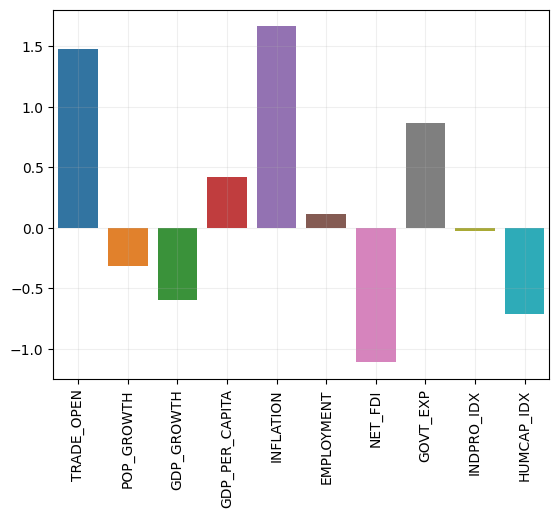

In [ ]:
# Calculate the skewness
skewness = trade_df.skew()

# Plot the skewness
sns.barplot(x=skewness.index, y=skewness)
plt.xticks(rotation = 90)
plt.grid(alpha = 0.2)

From the plots above, it can be observed that TRADE_OPEN, INFLATION, and NET_FDI are highly skewed.
We take the log transformations of these variable to make them normal

## Checking for Linearity between the endogenous variable and exogenous variables

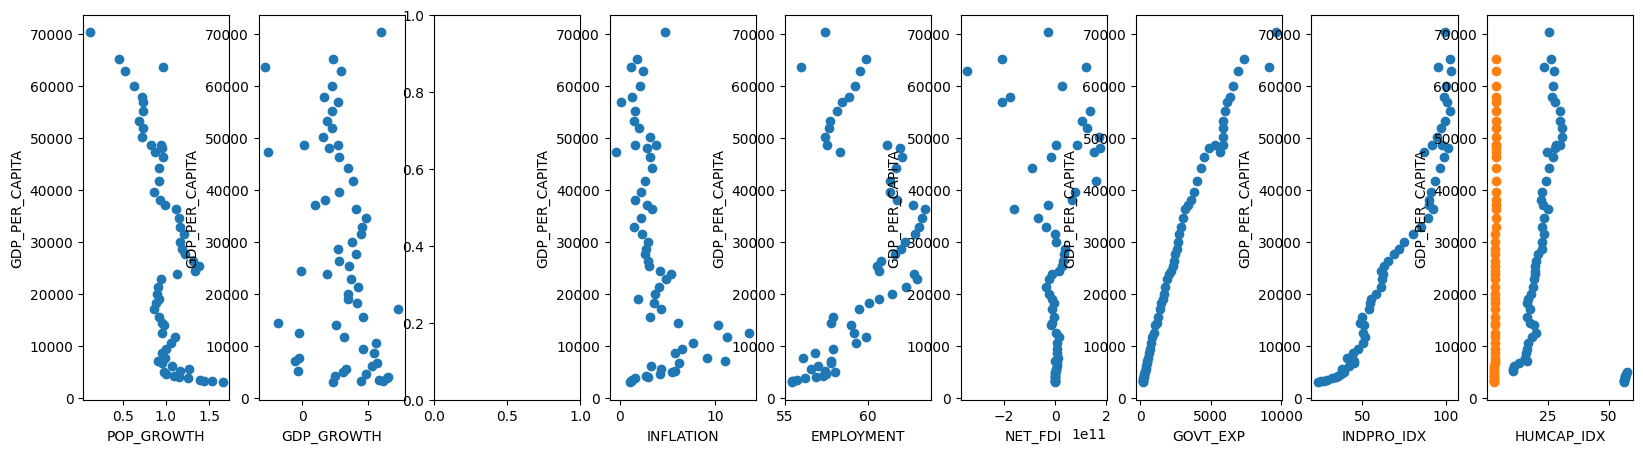

In [ ]:
# Create a figure with subplots for each independent variable
fig, axs = plt.subplots(nrows=1, ncols=len(trade_df.columns)-1, figsize=(20,5))

# Iterate over the columns, skipping the endogenous variable GDP_PER_CAPITA
for i, col in enumerate(trade_df.columns):
    if col != 'GDP_PER_CAPITA':
        axs[i-1].scatter(trade_df[col], trade_df['GDP_PER_CAPITA'])
        axs[i-1].set_xlabel(col)
        axs[i-1].set_ylabel('GDP_PER_CAPITA')

# Show the plot
plt.show()

The scatter plots shows a non-linear relationship, thus, showing a curved or otherwise non-linear pattern.

## Taking Log Transformations

In [ ]:
# apply the logarithm function of TRADE_OPEN, GDP_PER_CAPITA and Employment
trade_df['log_TRADE_OPEN'] = trade_df['TRADE_OPEN'].apply(np.log)
trade_df['log_GDP_PER_CAPITA'] = trade_df['GDP_PER_CAPITA'].apply(np.log)
trade_df['log_EMPLOYMENT'] = trade_df['EMPLOYMENT'].apply(np.log)
trade_df['log_POP_GROWTH'] = trade_df['POP_GROWTH'].apply(np.log)
trade_df['log_INFLATION'] = trade_df['INFLATION'].apply(np.log)
trade_df['log_GOVT_EXP'] = trade_df['GOVT_EXP'].apply(np.log)
trade_df['log_GDP_GROWTH'] = trade_df['GDP_GROWTH'].apply(np.log)
trade_df['log_INDPRO_IDX'] = trade_df['INDPRO_IDX'].apply(np.log)
trade_df['log_HUMCAP_IDX'] = trade_df['HUMCAP_IDX'].apply(np.log)


In [ ]:
trade_df

,TRADE_OPEN,POP_GROWTH,GDP_GROWTH,GDP_PER_CAPITA,INFLATION,EMPLOYMENT,NET_FDI,GOVT_EXP,INDPRO_IDX,HUMCAP_IDX,log_TRADE_OPEN,log_GDP_PER_CAPITA,log_EMPLOYMENT,log_POP_GROWTH,log_INFLATION,log_GOVT_EXP,log_GDP_GROWTH,log_INDPRO_IDX,log_HUMCAP_IDX
Year,,,,,,,,,,,,,,,,,,,
1961,56.341751,1.657730,2.300000,3066.562869,1.070724,55.400000,5.634175e+01,161.749,23.3892,2.755555,4.031436,8.028313,4.014580,0.505449,0.068335,5.086046,0.832909,3.152274,1.013619
1962,56.373164,1.537997,6.100000,3243.843078,1.198773,55.500000,5.637316e+01,174.455,25.3385,2.790292,4.031993,8.084514,4.016383,0.430481,0.181299,5.161667,1.808289,3.232325,1.026146
1963,56.393356,1.439165,4.400000,3374.515171,1.239669,55.400000,5.639336e+01,182.854,26.8912,2.825467,4.032351,8.124007,4.014580,0.364063,0.214845,5.208688,1.481605,3.291799,1.038674
1964,56.525545,1.389046,5.800000,3573.941185,1.278912,55.700000,5.652555e+01,192.328,28.7016,2.861085,4.034693,8.181424,4.019980,0.328617,0.246009,5.259202,1.757858,3.356953,1.051201
1965,56.643989,1.250172,6.400000,3827.527110,1.585169,56.200000,5.664399e+01,204.882,31.5538,2.897152,4.036786,8.249974,4.028917,0.223281,0.460691,5.322434,1.856298,3.451694,1.063728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,27.279161,0.632644,2.241921,59907.754260,2.130110,59.237000,2.859000e+10,6594.039,100.0000,3.738714,3.306123,11.000561,4.081546,-0.457847,0.756174,8.793921,0.807333,4.605170,1.318742
2018,27.610379,0.526435,2.945385,62823.309440,2.442583,59.549000,-3.450000e+11,6937.736,103.1501,3.744024,3.318192,11.048081,4.086799,-0.641627,0.893056,8.844731,1.080239,4.636185,1.320161
2019,26.451949,0.455381,2.294439,65120.394660,1.812210,59.923000,-2.090000e+11,7338.825,102.4293,3.749341,3.275330,11.083993,4.093060,-0.786620,0.594547,8.900934,0.830488,4.629173,1.321580


In [ ]:
trade_df.isna().sum()

TRADE_OPEN            0
POP_GROWTH            0
GDP_GROWTH            0
GDP_PER_CAPITA        0
INFLATION             0
EMPLOYMENT            0
NET_FDI               0
GOVT_EXP              0
INDPRO_IDX            0
HUMCAP_IDX            2
log_TRADE_OPEN        0
log_GDP_PER_CAPITA    0
log_EMPLOYMENT        0
log_POP_GROWTH        0
log_INFLATION         1
log_GOVT_EXP          0
log_GDP_GROWTH        8
log_INDPRO_IDX        0
log_HUMCAP_IDX        2
dtype: int64

In [ ]:
trade_df = trade_df.dropna()

In [ ]:
corr = trade_df.corr()

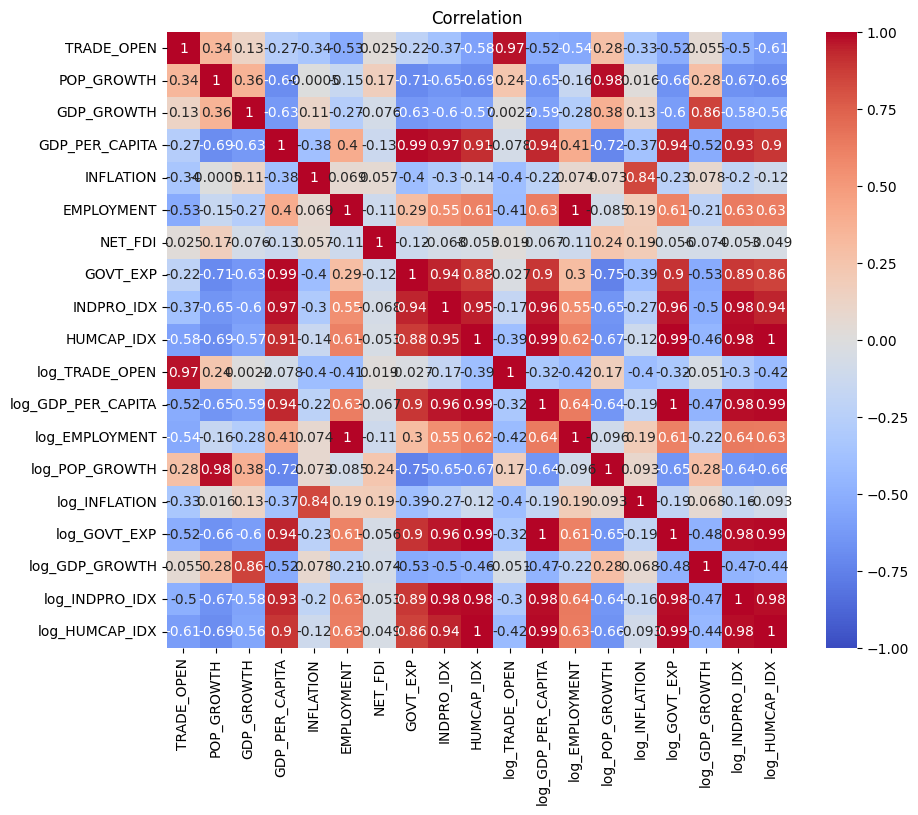

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

# create a heatmap using seaborn
heatmap = sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=ax)

# set rotation for x-axis and y-axis tick labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)

# set plot title
plt.title('Correlation')

# show the plot
plt.show()

In [ ]:
# import matplotlib.pyplot as plt

# fig, ax = plt.subplots(figsize=(15, 8))

# # plot specific columns
# ax.plot(trade_df.index, trade_df['log_POP_GROWTH'], label='Population Growth')
# ax.plot(trade_df.index, trade_df['GDP_GROWTH'], label='GDP Growth')
# ax.plot(trade_df.index, trade_df['log_INFLATION'], label='Inflation')
# ax.plot(trade_df.index, trade_df['NET_FDI'], label='Net FDI')
# ax.plot(trade_df.index, trade_df['log_TRADE_OPEN'], label='Log Trade Open')
# ax.plot(trade_df.index, trade_df['log_GDP_PER_CAPITA'], label='Log GDP Per Capita')
# ax.plot(trade_df.index, trade_df['log_EMPLOYMENT'], label='Log Employment')
# #ax.plot(trade_df.index, trade_df['NAFTA'], label='NAFTA')

# # add title and labels
# ax.set_title('Economic Indicators Over Time')
# ax.set_xlabel('Year')
# ax.set_ylabel('Value')

# # add legend
# ax.legend()

# # display the plot
# plt.show()

## Dropping Original Columns and keeping the log_columns

In [ ]:
trade_df.drop(columns=(['GDP_GROWTH' ,'TRADE_OPEN', 'GDP_PER_CAPITA', 'EMPLOYMENT', 'INFLATION', 'POP_GROWTH', 'GOVT_EXP', 'INDPRO_IDX', 'HUMCAP_IDX']), inplace= True)
#trade_df.drop(columns=(['TRADE_OPEN', 'INFLATION']), inplace= True)
trade_df

C:\Users\akoto\AppData\Local\Temp\ipykernel_14448\1284745632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_df.drop(columns=(['GDP_GROWTH' ,'TRADE_OPEN', 'GDP_PER_CAPITA', 'EMPLOYMENT', 'INFLATION', 'POP_GROWTH', 'GOVT_EXP', 'INDPRO_IDX', 'HUMCAP_IDX']), inplace= True)


,NET_FDI,log_TRADE_OPEN,log_GDP_PER_CAPITA,log_EMPLOYMENT,log_POP_GROWTH,log_INFLATION,log_GOVT_EXP,log_GDP_GROWTH,log_INDPRO_IDX,log_HUMCAP_IDX
Year,,,,,,,,,,
1961,5.634175e+01,4.031436,8.028313,4.014580,0.505449,0.068335,5.086046,0.832909,3.152274,1.013619
1962,5.637316e+01,4.031993,8.084514,4.016383,0.430481,0.181299,5.161667,1.808289,3.232325,1.026146
1963,5.639336e+01,4.032351,8.124007,4.014580,0.364063,0.214845,5.208688,1.481605,3.291799,1.038674
1964,5.652555e+01,4.034693,8.181424,4.019980,0.328617,0.246009,5.259202,1.757858,3.356953,1.051201
1965,5.664399e+01,4.036786,8.249974,4.028917,0.223281,0.460691,5.322434,1.856298,3.451694,1.063728
1966,5.692283e+01,4.041696,8.329976,4.041295,0.144008,1.103625,5.446737,1.871802,3.536471,1.074446
1967,5.685316e+01,4.040472,8.374806,4.048301,0.085151,1.019852,5.565401,0.916291,3.557828,1.085164
1968,5.708611e+01,4.044561,8.454450,4.051785,-0.001540,1.452034,5.665575,1.568616,3.611890,1.095882
1969,5.738344e+01,4.049756,8.523602,4.060443,-0.023020,1.697886,5.736434,1.131402,3.657268,1.106600


## Test for Staionarity using Agmented Dicky Fuller(ADF) Test

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    
    
    adf_result = adfuller(timeseries)
    adf_stat, pvalue, lags, _, _, _ = adf_result
    
    if pvalue < 0.05:
        print(f"The ADF test result indicates that the time series is stationary (p-value: {pvalue:.4f})")
    else:
        print(f"The ADF test result indicates that the time series is non-stationary (p-value: {pvalue:.4f})")
        
    return adf_stat, pvalue, lags
        
adf_test(trade_df['log_GDP_GROWTH'])

The ADF test result indicates that the time series is stationary (p-value: 0.0000)


(-5.040731312750054, 1.8422223368271376e-05, 0)

In [ ]:
adf_test(trade_df['NET_FDI'])

The ADF test result indicates that the time series is stationary (p-value: 0.0026)


(-3.828739090375463, 0.0026265901853781536, 9)

In [ ]:
adf_test(trade_df['log_TRADE_OPEN'])

The ADF test result indicates that the time series is non-stationary (p-value: 0.3807)


(-1.7994476958501469, 0.3807359317452598, 10)

In [ ]:
adf_test(trade_df['log_GDP_PER_CAPITA'])

The ADF test result indicates that the time series is stationary (p-value: 0.0002)


(-4.510905687070589, 0.0001879075718136487, 10)

In [ ]:
adf_test(trade_df['log_EMPLOYMENT'])

The ADF test result indicates that the time series is non-stationary (p-value: 0.2245)


(-2.151050557458598, 0.22448818002517046, 1)

In [ ]:
adf_test(trade_df['log_POP_GROWTH'])

The ADF test result indicates that the time series is non-stationary (p-value: 0.9419)


(-0.17130837414263575, 0.941856286436308, 3)

In [ ]:
adf_test(trade_df['log_INFLATION'])

The ADF test result indicates that the time series is stationary (p-value: 0.0050)


(-3.6450245985896688, 0.004956351914298894, 0)

In [ ]:
adf_test(trade_df['log_GOVT_EXP'])

The ADF test result indicates that the time series is stationary (p-value: 0.0081)


(-3.4948048025132263, 0.008121524482640103, 0)

In [ ]:
adf_test(trade_df['log_INDPRO_IDX'])

The ADF test result indicates that the time series is stationary (p-value: 0.0007)


(-4.192033861324089, 0.0006796601211276812, 0)

## Taking first difference since some variables are not stationary

In [ ]:
trade_df_trans = trade_df.diff().dropna()
trade_df = trade_df.iloc[1:]
print(trade_df.shape)
trade_df_trans.shape

(51, 10)


(51, 10)

In [ ]:
trade_df_trans

,NET_FDI,log_TRADE_OPEN,log_GDP_PER_CAPITA,log_EMPLOYMENT,log_POP_GROWTH,log_INFLATION,log_GOVT_EXP,log_GDP_GROWTH,log_INDPRO_IDX,log_HUMCAP_IDX
Year,,,,,,,,,,
1962,3.141289e-02,0.000557,0.056201,0.001803,-0.074968,0.112964,0.075621,0.975380,0.080051,0.012527
1963,2.019201e-02,0.000358,0.039493,-0.001803,-0.066418,0.033546,0.047021,-0.326684,0.059474,0.012527
1964,1.321896e-01,0.002341,0.057417,0.005401,-0.035446,0.031165,0.050514,0.276253,0.065154,0.012527
1965,1.184439e-01,0.002093,0.068550,0.008937,-0.105336,0.214682,0.063232,0.098440,0.094741,0.012527
1966,2.788359e-01,0.004911,0.080001,0.012379,-0.079273,0.642934,0.124303,0.015504,0.084777,0.010718
1967,-6.967000e-02,-0.001225,0.044830,0.007005,-0.058857,-0.083772,0.118664,-0.955511,0.021357,0.010718
1968,2.329504e-01,0.004089,0.079644,0.003484,-0.086691,0.432182,0.100174,0.652325,0.054063,0.010718
1969,2.973317e-01,0.005195,0.069152,0.008658,-0.021480,0.245851,0.070858,-0.437214,0.045377,0.010718
1971,4.850000e+09,-1.674182,0.108594,-0.024434,0.257565,-0.240954,0.185287,0.060504,-0.019955,0.021534


In [ ]:
adf_test(trade_df_trans['log_EMPLOYMENT'])

In [ ]:
adf_test(trade_df_trans['log_POP_GROWTH'])

In [ ]:
adf_test(trade_df_trans['log_INFLATION'])

The ADF test result indicates that the time series is stationary (p-value: 0.0077)


(-3.5106363520782695, 0.007718095080470512, 5)

In [ ]:
adf_test(trade_df_trans['log_POP_GROWTH'])

The ADF test result indicates that the time series is stationary (p-value: 0.0012)


(-4.033583552544084, 0.0012445153910211725, 2)

In [ ]:
adf_test(trade_df_trans['log_EMPLOYMENT'])

The ADF test result indicates that the time series is stationary (p-value: 0.0000)


(-5.726145507571824, 6.764237702572017e-07, 0)

In [ ]:
adf_test(trade_df_trans['log_GOVT_EXP'])

The ADF test result indicates that the time series is non-stationary (p-value: 0.4606)


(-1.6431452439138, 0.4606177882166704, 3)

## Taking the first lag of the dependent variable (log_GDP_PER_CAPITA) and adding to the dataset

In [ ]:
trade_df_trans['log_GDP_PER_CAPITA_lag1'] = trade_df_trans['log_GDP_PER_CAPITA'].shift(1)

In [ ]:
trade_df_trans

,NET_FDI,log_TRADE_OPEN,log_GDP_PER_CAPITA,log_EMPLOYMENT,log_POP_GROWTH,log_INFLATION,log_GOVT_EXP,log_GDP_GROWTH,log_INDPRO_IDX,log_HUMCAP_IDX,log_GDP_PER_CAPITA_lag1
Year,,,,,,,,,,,
1962,3.141289e-02,0.000557,0.056201,0.001803,-0.074968,0.112964,0.075621,0.975380,0.080051,0.012527,NaN
1963,2.019201e-02,0.000358,0.039493,-0.001803,-0.066418,0.033546,0.047021,-0.326684,0.059474,0.012527,0.056201
1964,1.321896e-01,0.002341,0.057417,0.005401,-0.035446,0.031165,0.050514,0.276253,0.065154,0.012527,0.039493
1965,1.184439e-01,0.002093,0.068550,0.008937,-0.105336,0.214682,0.063232,0.098440,0.094741,0.012527,0.057417
1966,2.788359e-01,0.004911,0.080001,0.012379,-0.079273,0.642934,0.124303,0.015504,0.084777,0.010718,0.068550
1967,-6.967000e-02,-0.001225,0.044830,0.007005,-0.058857,-0.083772,0.118664,-0.955511,0.021357,0.010718,0.080001
1968,2.329504e-01,0.004089,0.079644,0.003484,-0.086691,0.432182,0.100174,0.652325,0.054063,0.010718,0.044830
1969,2.973317e-01,0.005195,0.069152,0.008658,-0.021480,0.245851,0.070858,-0.437214,0.045377,0.010718,0.079644
1971,4.850000e+09,-1.674182,0.108594,-0.024434,0.257565,-0.240954,0.185287,0.060504,-0.019955,0.021534,0.069152


In [ ]:
trade_df_trans = trade_df_trans.dropna()

In [ ]:
trade_df_trans.isna().sum()

NET_FDI                    0
log_TRADE_OPEN             0
log_GDP_PER_CAPITA         0
log_EMPLOYMENT             0
log_POP_GROWTH             0
log_INFLATION              0
log_GOVT_EXP               0
log_GDP_GROWTH             0
log_INDPRO_IDX             0
log_HUMCAP_IDX             0
log_GDP_PER_CAPITA_lag1    0
dtype: int64

## CUSUM Test to check Structural Breaks in the log_GDP_PER_CAPITA

In [ ]:
import statsmodels.api as sm

# Fit a linear regression model to the entire data set
model = sm.OLS(trade_df_trans['log_GDP_PER_CAPITA'], sm.add_constant(trade_df_trans.drop('log_GDP_PER_CAPITA', axis=1))).fit()

# Perform the CUSUM test
cusum_test = sm.stats.diagnostic.breaks_cusumolsresid(model.resid, ddof=1)

# Print the results
print(cusum_test)

(1.0576812618422837, 0.21321613543688098, [(1, 1.63), (5, 1.36), (10, 1.22)])


The output of the CUSUM test is a tuple of three elements. The first element is the maximum value of the CUSUM statistic, the second element is the p-value associated with the test, and the third element is a list of tuples indicating the locations of the breaks detected by the test.

In this particular case, the maximum value of the CUSUM statistic is 1.05768, and the p-value is 0.21322. Since the p-value is greater than the conventional threshold of 0.05, we fail to reject the null hypothesis that there are no structural breaks in the data.

## CUSUM test plot

In [ ]:
import statsmodels.api as sm

y = trade_df_trans['log_GDP_PER_CAPITA']
X = trade_df_trans.drop(['log_GDP_PER_CAPITA'], axis=1)

# Fit a linear regression model to the data
model = sm.OLS(y, sm.add_constant(X)).fit()

# Calculate the residuals
residuals = model.resid

# Calculate the cumulative sum of the residuals
cumulative_sum = np.cumsum(residuals)

cumulative_sum

Year
1963   -3.641445e-03
1964   -5.723752e-03
1965   -9.101568e-03
1966   -4.209609e-02
1967   -8.641830e-02
1968   -9.539961e-02
1969   -9.454743e-02
1971   -8.795659e-02
1972   -9.140131e-02
1973   -7.640681e-02
1976   -5.622930e-02
1977   -5.321280e-02
1978   -5.211683e-02
1979   -4.009359e-02
1981   -1.684228e-02
1983   -1.793643e-02
1984   -1.764595e-02
1985   -2.670509e-02
1986   -4.152921e-02
1987   -4.997195e-02
1988   -4.245804e-02
1989   -4.328252e-02
1990   -5.326971e-02
1992   -5.569439e-02
1993   -5.066857e-02
1994   -5.063749e-02
1995   -5.987837e-02
1996   -5.725338e-02
1997   -5.271412e-02
1998   -4.341243e-02
1999   -3.941001e-02
2000   -3.085419e-02
2001   -2.448218e-02
2002   -3.274758e-02
2003   -3.377371e-02
2004   -2.551933e-02
2005   -3.064416e-02
2006   -2.960171e-02
2007   -3.745957e-02
2008   -4.828855e-02
2010   -6.567472e-02
2011   -3.764267e-02
2012   -1.616767e-02
2013    7.548597e-03
2014    7.099108e-03
2015    6.428724e-03
2016   -9.823211e-04
2017    

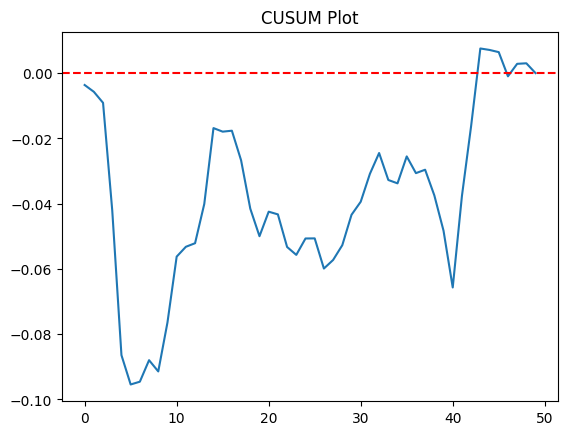

In [ ]:
# Extract the values from the series
cumulative_sum_values = cumulative_sum.values

# Plot the CUSUM curve for country "CAN"
plt.plot(cumulative_sum_values)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('CUSUM Plot')
plt.show()

## Check for Multicollinearity using Variance Inflation Factor (VIF)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


# Drop the response variable from the DataFrame and create a constant column
X = add_constant(trade_df_trans.drop(['log_GDP_PER_CAPITA'], axis=1))

# Compute the VIF for each predictor variable
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF for each variable
print(vif)

                   Variable       VIF
0                     const  5.167277
1                   NET_FDI  1.159694
2            log_TRADE_OPEN  1.595503
3            log_EMPLOYMENT  3.572644
4            log_POP_GROWTH  1.285637
5             log_INFLATION  1.412188
6              log_GOVT_EXP  5.031318
7            log_GDP_GROWTH  1.493975
8            log_INDPRO_IDX  3.936094
9            log_HUMCAP_IDX  4.137784
10  log_GDP_PER_CAPITA_lag1  1.938864


Looking at the VIF results above, we can see that all variables have VIF values below 10, which suggests that there is not a severe issue of multicollinearity in the regression model. However, some variables have relatively high VIF values above 2.5, which may be a concern for further investigation. In particular, the variables log_EMPLOYMENT, log_GDP_PER_CAPITA_lag1, and log_GOVT_EXP have VIF values above 2.5, indicating some degree of multicollinearity. The VIF results suggest that there is not a severe issue of multicollinearity in the model

## Breusch Pagan test for heteroscedasticity

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan


# Define the response variable and predictor variables
y = trade_df_trans['log_GDP_PER_CAPITA']
X = trade_df_trans.drop(columns= 'log_GDP_PER_CAPITA')

# Fit a linear regression model
model = sm.OLS(y, sm.add_constant(X)).fit()

# Compute the Breusch-Pagan test
bp_test = het_breuschpagan(model.resid, model.model.exog)

# Print the test results
print('Breusch-Pagan test results:')
print('Test statistic:', bp_test[0])
print('p-value:', bp_test[1])
print('F-statistic:', bp_test[2])
print('F p-value:', bp_test[3])

# Check for heteroscedasticity
if bp_test[1] < 0.05:
    print('The Breusch-Pagan test indicates that there is heteroscedasticity in the residuals.')
else:
    print('The Breusch-Pagan test indicates that there is no evidence of heteroscedasticity in the residuals.')

Breusch-Pagan test results:
Test statistic: 7.541035892874564
p-value: 0.6735690219028144
F-statistic: 0.6926697483247181
F p-value: 0.7249068568497433
The Breusch-Pagan test indicates that there is no evidence of heteroscedasticity in the residuals.


## Autocorrelation and Partial Autocorelation Plot

c:\Users\akoto\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


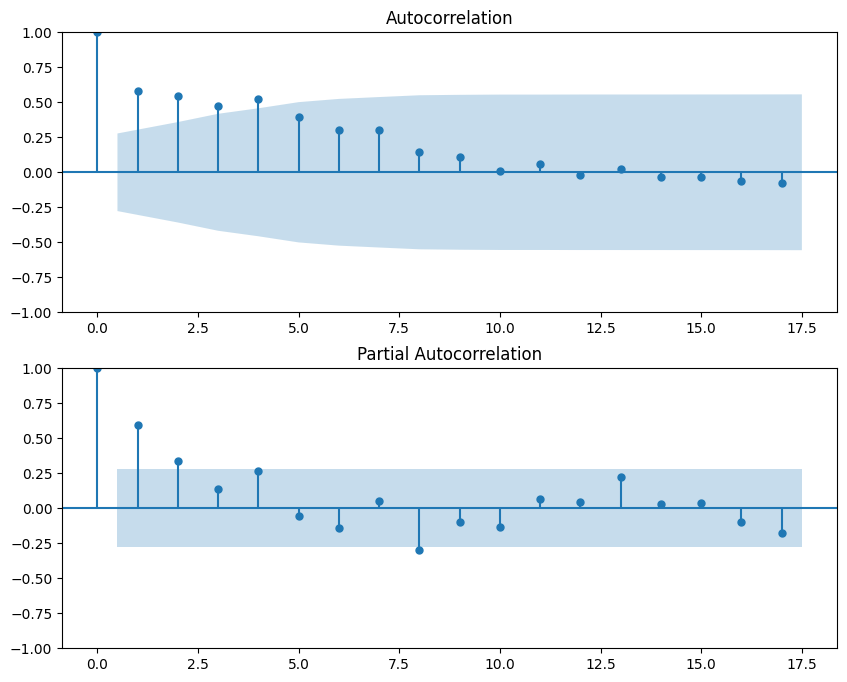

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

column = trade_df_trans['log_GDP_PER_CAPITA'].values

# Plot the autocorrelation and partial autocorrelation of the data
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,8))
plot_acf(column, ax=ax1)
plot_pacf(column, ax=ax2)
plt.show()

In [ ]:
# from sklearn.linear_model import LinearRegression

# # Specify the independent and dependent variables
# y = trade_df_trans['log_GDP_PER_CAPITA']
# X = trade_df_trans.drop(['log_GDP_PER_CAPITA'], axis=1)

# # Create a linear regression object
# model = LinearRegression()

# # Fit the model to the data
# model.fit(X, y)

# # Print the coefficients and intercept
# print('Coefficients:', model.coef_)
# print('Intercept:', model.intercept_)

In [ ]:
# # Specify the independent and dependent variables
# y = trade_df_trans['log_GDP_PER_CAPITA']
# X = trade_df_trans.drop(['log_GDP_PER_CAPITA'], axis=1)

# # Add a constant term to the independent variables for the intercept
# X = sm.add_constant(X)

# # Fit the fixed-effects regression model
# model = sm.OLS(y, X)
# results = model.fit()

# # Print the summary of the regression results
# print(results.summary())


In [ ]:
# # Plot the residuals versus the fitted values
# fig, ax = plt.subplots(figsize=(10, 6))
# sns.residplot(x=results.fittedvalues,
#                 y=results.resid,
#                 lowess=True,
#                 color='b',
#                 line_kws={'linestyle':'--', 'color':'red'})
# ax.set_xlabel('Fitted Values')
# ax.set_ylabel('Residuals')
# ax.set_title('Residual Plot')
# plt.show()


# # Plot the distribution of the residuals
# fig, ax = plt.subplots(figsize=(10, 6))
# sns.distplot(results.resid,
#             hist=True,
#             kde=True,
#             kde_kws={'shade': True})
# ax.set_xlabel('Residuals')
# ax.set_ylabel('Density')
# ax.set_title('Distribution of Residuals')
# ax.axvline(0, color='black', linestyle='--')
# plt.show()


# # # Plot a heatmap of the correlation matrix
# # fig, ax = plt.subplots(figsize=(10, 8))
# # sns.heatmap(corr, annot=True, cmap='RdBu_r', ax=ax)
# # plt.title('Correlation Matrix')
# # plt.show()

## Analysing the data using ARIMA model

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

# Specify the independent and dependent variables
y = trade_df['log_GDP_PER_CAPITA']
X = trade_df.drop(['log_GDP_PER_CAPITA'], axis=1)

# Create the ARIMA model object with the appropriate parameters
order = (2, 0, 0) # AR(1) model
model = ARIMA(y, exog=X, order=order)

# Fit the model to the data using the heteroskedasticity-consistent estimator
results = model.fit(method= 'yule_walker', cov_type= 'robust')

# Print the summary of the results
print(results.summary())

c:\Users\akoto\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\akoto\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\akoto\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:     log_GDP_PER_CAPITA   No. Observations:                   51
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 160.773
Date:                Thu, 13 Apr 2023   AIC                           -295.547
Time:                        10:59:57   BIC                           -270.433
Sample:                             0   HQIC                          -285.950
                                 - 51                                         
Covariance Type:               robust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1028   2.92e-29  -3.52e+27      0.000      -0.103      -0.103
NET_FDI        -3.694e-15   9.84e-15     -0.376      0.707    -2.3e-14    1.56e-14
log_TRADE_OPEN     0.0013   2.41e-28

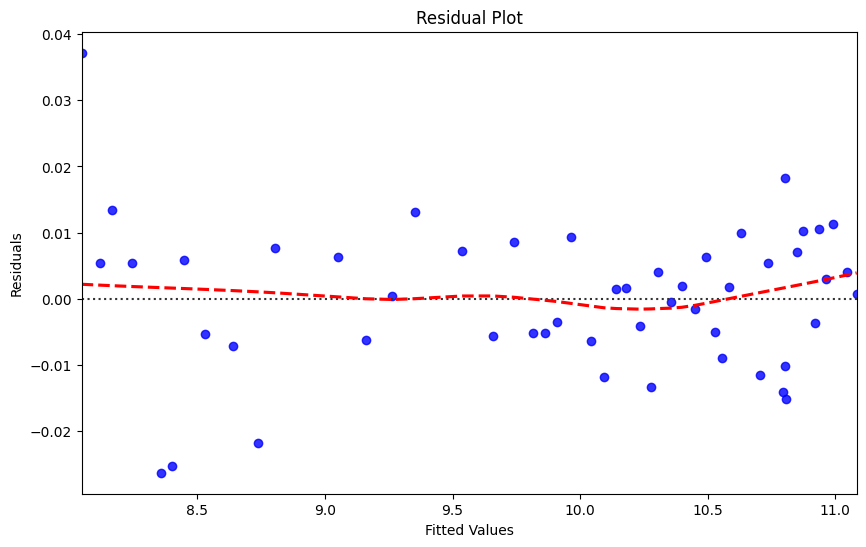

C:\Users\akoto\AppData\Local\Temp\ipykernel_14448\2543041482.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(results.resid,
c:\Users\akoto\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


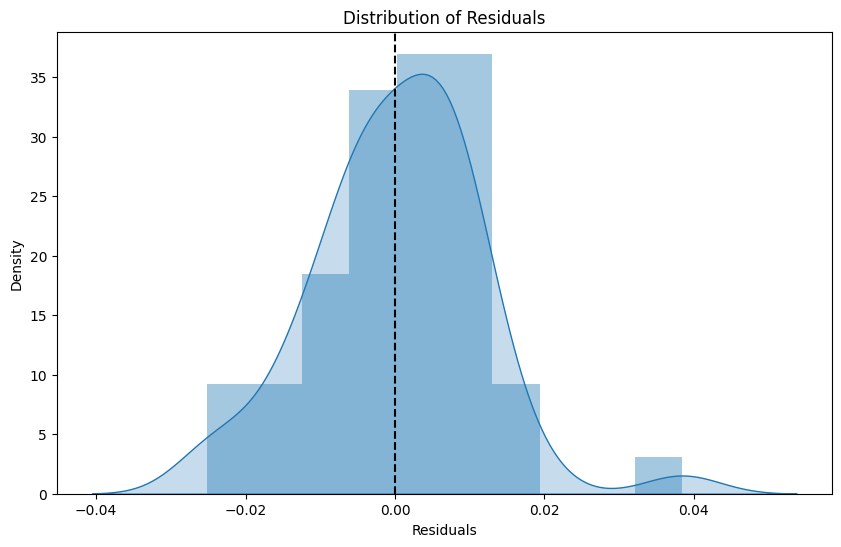

In [ ]:
# Plot the residuals versus the fitted values
fig, ax = plt.subplots(figsize=(10, 6))
sns.residplot(x=results.fittedvalues,
                y=results.resid,
                lowess=True,
                color='b',
                line_kws={'linestyle':'--', 'color':'red'})
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Residuals')
ax.set_title('Residual Plot')
plt.show()


# Plot the distribution of the residuals
fig, ax = plt.subplots(figsize=(10, 6))
sns.distplot(results.resid,
            hist=True,
            kde=True,
            kde_kws={'shade': True})
ax.set_xlabel('Residuals')
ax.set_ylabel('Density')
ax.set_title('Distribution of Residuals')
ax.axvline(0, color='black', linestyle='--')
plt.show()

# # Plot a heatmap of the correlation matrix
# fig, ax = plt.subplots(figsize=(10, 8))
# sns.heatmap(corr, annot=True, cmap='RdBu_r', ax=ax)
# plt.title('Correlation Matrix')
# plt.show()

In [ ]:
# # Specify the independent and dependent variables
# y = trade_df['log_GDP_PER_CAPITA']
# X = trade_df.drop(['log_GDP_PER_CAPITA'], axis=1)

# # Add a constant term to the independent variables
# X = sm.add_constant(X)

# # define your OLS model
# model_ols = sm.OLS(y, X)

# # fit the OLS model
# results_ols = model_ols.fit()

# # get the residuals from the OLS model
# residuals = results_ols.resid

# # calculate the variance-covariance matrix of the errors
# sigma = np.cov(residuals, rowvar=False)

# # define your GLS model
# model_gls = sm.GLS(y, X, sigma=sigma)

# # fit the model
# results_gls = model_gls.fit()

# # view the summary of the results
# print(results_gls.summary())


In [ ]:
# # Plot the residuals versus the fitted values
# fig, ax = plt.subplots(figsize=(10, 6))
# sns.residplot(x=results.fittedvalues,
#                 y=results.resid,
#                 lowess=True,
#                 color='b',
#                 line_kws={'linestyle':'--', 'color':'red'})
# ax.set_xlabel('Fitted Values')
# ax.set_ylabel('Residuals')
# ax.set_title('Residual Plot')
# plt.show()


# # Plot the distribution of the residuals
# fig, ax = plt.subplots(figsize=(10, 6))
# sns.distplot(results.resid,
#             hist=False,
#             kde=True,
#             kde_kws={'shade': True})
# ax.set_xlabel('Residuals')
# ax.set_ylabel('Density')
# ax.set_title('Distribution of Residuals')
# plt.show()

# # # Plot a heatmap of the correlation matrix
# # fig, ax = plt.subplots(figsize=(10, 8))
# # sns.heatmap(corr, annot=True, cmap='RdBu_r', ax=ax)
# # plt.title('Correlation Matrix')
# # plt.show()